In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline


Using TensorFlow backend.


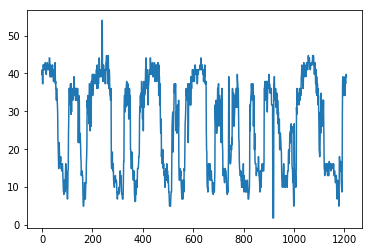

In [2]:
# load the dataset
##bb表表示风速
dataframe = pd.read_excel('speed.xlsx')
dataset = dataframe.iloc[:,1].values
# 将整型变为float
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()


In [3]:
dataset=dataset[:-1]
print(dataset.shape)

(1208,)


In [4]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
np.random.seed(7)


In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = np.reshape(dataset,newshape=(-1,1))
dataset = scaler.fit_transform(dataset)


# split into train and test sets
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



In [23]:
# use this function to prepare the train and test datasets for modeling
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [24]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)
print(testX.shape)

(1083, 1, 3)
(117, 1, 3)


In [25]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_acc',patience=5)


In [26]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(128, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=200,callbacks=[es],verbose=2)



Epoch 1/50
 - 1s - loss: 0.2345
Epoch 2/50
 - 0s - loss: 0.1725
Epoch 3/50
 - 0s - loss: 0.1200
Epoch 4/50
 - 0s - loss: 0.0774
Epoch 5/50
 - 0s - loss: 0.0459
Epoch 6/50
 - 0s - loss: 0.0252
Epoch 7/50
 - 0s - loss: 0.0146
Epoch 8/50
 - 0s - loss: 0.0114
Epoch 9/50
 - 0s - loss: 0.0118


D:\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 10/50
 - 0s - loss: 0.0122
Epoch 11/50
 - 0s - loss: 0.0118
Epoch 12/50
 - 0s - loss: 0.0110
Epoch 13/50
 - 0s - loss: 0.0105
Epoch 14/50
 - 0s - loss: 0.0102
Epoch 15/50
 - 0s - loss: 0.0101
Epoch 16/50
 - 0s - loss: 0.0098
Epoch 17/50
 - 0s - loss: 0.0096
Epoch 18/50
 - 0s - loss: 0.0094
Epoch 19/50
 - 0s - loss: 0.0092
Epoch 20/50
 - 0s - loss: 0.0090
Epoch 21/50
 - 0s - loss: 0.0088
Epoch 22/50
 - 0s - loss: 0.0086
Epoch 23/50
 - 0s - loss: 0.0085
Epoch 24/50
 - 0s - loss: 0.0083
Epoch 25/50
 - 0s - loss: 0.0081
Epoch 26/50
 - 0s - loss: 0.0080
Epoch 27/50
 - 0s - loss: 0.0079
Epoch 28/50
 - 0s - loss: 0.0077
Epoch 29/50
 - 0s - loss: 0.0076
Epoch 30/50
 - 0s - loss: 0.0075
Epoch 31/50
 - 0s - loss: 0.0074
Epoch 32/50
 - 0s - loss: 0.0073
Epoch 33/50
 - 0s - loss: 0.0072
Epoch 34/50
 - 0s - loss: 0.0071
Epoch 35/50
 - 0s - loss: 0.0071
Epoch 36/50
 - 0s - loss: 0.0070
Epoch 37/50
 - 0s - loss: 0.0069
Epoch 38/50
 - 0s - loss: 0.0069
Epoch 39/50
 - 0s - loss: 0.0068
Epoch 40/5

In [27]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [28]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [29]:
#预测值的结果
testPredict[:,0]

array([37.36293  , 37.701614 , 35.43109  , 35.736553 , 35.60092  ,
       35.155064 , 35.272022 , 33.272686 , 33.417847 , 31.832163 ,
       29.702305 , 24.890057 , 21.634459 , 19.405031 , 19.392971 ,
       21.3986   , 25.34703  , 25.937626 , 26.604221 , 29.276123 ,
       29.535713 , 30.687738 , 30.735968 , 31.2978   , 29.147217 ,
       27.959198 , 29.34177  , 30.033052 , 31.56754  , 28.96203  ,
       24.400988 , 19.26101  , 16.567205 , 15.169778 , 15.127661 ,
       15.057717 , 15.566467 , 16.212446 , 16.697557 , 16.499561 ,
       16.629103 , 15.985085 , 15.745699 , 15.3315935, 14.862696 ,
       14.523125 , 15.424014 , 15.572337 , 15.275485 , 14.523125 ,
       14.951644 , 16.172436 , 16.870108 , 17.115776 , 16.499561 ,
       16.629103 , 16.221024 , 16.152824 , 15.639678 , 15.703838 ,
       15.737492 , 16.350449 , 16.697557 , 16.499561 , 16.152824 ,
       15.875052 , 15.875052 , 15.875052 , 16.350449 , 16.221024 ,
       15.446234 , 14.659458 , 14.717773 , 14.589701 , 14.5231

In [30]:
testY[0]

array([39.15000083, 34.18000049, 36.04000104, 37.27999725, 34.18000049,
       36.04000104, 31.68999881, 34.18000049, 31.06999759, 26.71999847,
       19.87999922, 19.25999955, 18.02000023, 19.25999955, 24.22999834,
       29.82999826, 24.22999834, 26.71999847, 34.7999986 , 27.95999779,
       31.06999759, 32.93000125, 31.06999759, 26.10000036, 27.95999779,
       32.93000125, 29.82999826, 32.93000125, 26.10000036, 18.02000023,
       14.90999966, 14.90999966, 13.05000067, 14.28999999, 14.28999999,
       14.90999966, 16.15999968, 16.15999968, 14.90999966, 16.15999968,
       14.28999999, 14.28999999, 14.28999999, 13.05000067, 13.05000067,
       16.15999968, 14.28999999, 13.05000067, 13.05000067, 14.90999966,
       16.77999934, 16.15999968, 16.15999968, 14.90999966, 16.15999968,
       14.90999966, 14.90999966, 14.28999999, 14.90999966, 14.90999966,
       16.15999968, 16.15999968, 14.90999966, 14.90999966, 14.90999966,
       14.90999966, 14.90999966, 16.15999968, 14.90999966, 13.05

In [31]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f MSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MSE' % (testScore))


Train Score: 4.17 MSE
Test Score: 4.14 MSE


<Figure size 720x432 with 0 Axes>

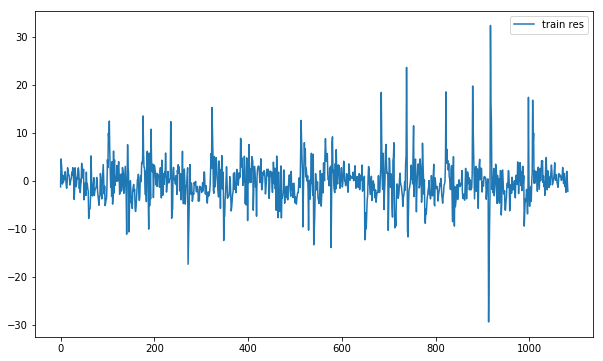

In [32]:
Res_train = []
for i,j in zip(trainY[0], trainPredict[:,0]):
    temp = i-j
    Res_train.append(temp)
Res_train = np.array(Res_train) 
plt.figure(figsize=(10,6))
plt.plot(Res_train,label='train res')
plt.legend(loc='best')
plt.show()

<Figure size 720x432 with 0 Axes>

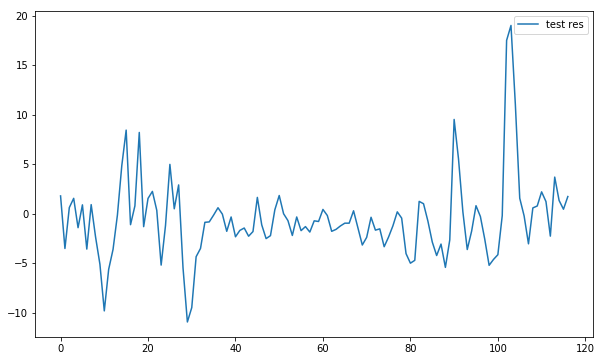

In [33]:
Res_test = []
for i,j in zip(testY[0], testPredict[:,0]):
    temp = i-j
    Res_test.append(temp)
Res_test = np.array(Res_test) 
plt.figure(figsize=(10,6))
plt.plot(Res_test,label='test res')
plt.legend(loc='best')
plt.show()

<Figure size 720x432 with 0 Axes>

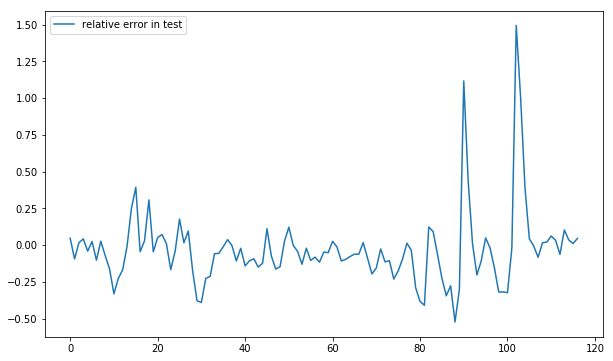

0.15197166581987012


In [34]:
relative_test = []
for i,j in zip(testY[0], testPredict[:,0]):
    temp = (i-j)/j
    relative_test.append(temp)
relative_test = np.array(relative_test) 
plt.figure(figsize=(10,6))
plt.plot(relative_test,label='relative error in test')
plt.legend(loc='best')
plt.show()
print(sum(abs(relative_test))/len(relative_test))

<Figure size 720x432 with 0 Axes>

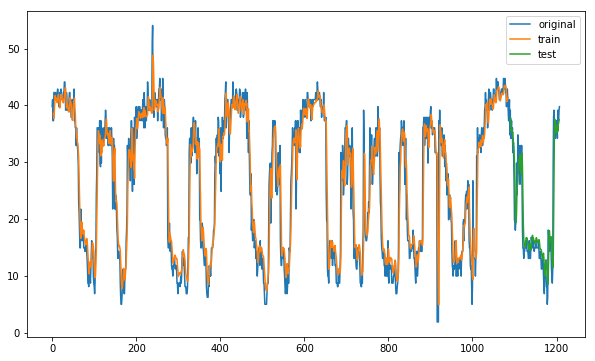

In [35]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset),label='original')
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.legend(loc='best')
plt.show()


In [39]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
print(testPredict.shape)

ss = np.reshape(dataset[-117:],newshape=(-1,1))
print(ss.shape)
mm = np.empty_like(dataset)
mm[:,:] = np.nan
mm[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = ss
print(mm.shape)


(117, 1)
(117, 1)
(1208, 1)


<Figure size 720x432 with 0 Axes>

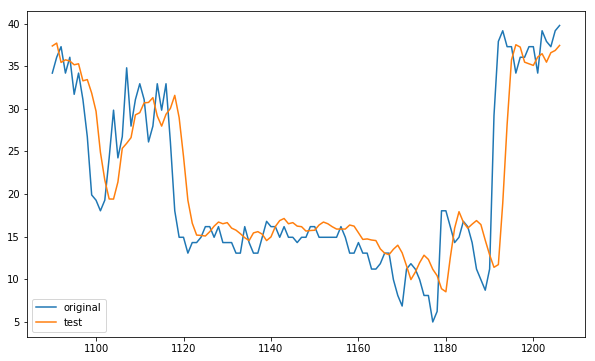

In [40]:
# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(mm),label='original')
plt.plot(testPredictPlot,label='test')
plt.legend(loc='best')
plt.show()

In [38]:
x = dataframe.iloc[:,0]
print(x)

0       4/11/2016 00:08:22
1       4/11/2016 00:16:22
2       4/11/2016 00:19:22
3       4/11/2016 00:22:23
4       4/11/2016 00:31:22
5       4/11/2016 00:33:23
6       4/11/2016 00:41:22
7       4/11/2016 00:51:23
8       4/11/2016 00:55:23
9       4/11/2016 01:00:23
10      4/11/2016 01:04:23
11      4/11/2016 01:10:23
12      4/11/2016 01:15:23
13      4/11/2016 01:21:22
14      4/11/2016 01:26:22
15      4/11/2016 01:31:22
16      4/11/2016 01:33:22
17      4/11/2016 01:39:23
18      4/11/2016 01:46:22
19      4/11/2016 01:47:22
20      4/11/2016 01:54:23
21      4/11/2016 02:01:23
22      4/11/2016 02:06:23
23      4/11/2016 02:10:22
24      4/11/2016 02:16:21
25      4/11/2016 02:20:23
26      4/11/2016 02:26:21
27      4/11/2016 02:30:23
28      4/11/2016 02:36:22
29      4/11/2016 02:39:22
               ...        
1179    4/17/2016 19:53:12
1180    4/17/2016 20:01:11
1181    4/17/2016 20:06:11
1182    4/17/2016 20:14:11
1183    4/17/2016 20:30:11
1184    4/17/2016 20:33:11
1